In [1]:
path = r'C:\Users\user\Desktop\NLP'

In [2]:
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

'''Using NLTK would have been interesting because it has some good pre-process functions like Stemming/Lemming. But in the case
of spam detection, Upper/Lower case are important because some SPAM are written in CAPSLOCK.'''

'Using NLTK would have been interesting because it has some good pre-process functions like Stemming/Lemming. But in the case\nof spam detection, Upper/Lower case are important because some SPAM are written in CAPSLOCK.'

In [4]:
import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt

import keras

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
from functions import plot_history

In [6]:
with open('XY.data', 'rb') as f:
    sentences_train, sentences_test, y_train, y_test = pickle.load(f)
    
sentences_train.shape, sentences_test.shape

((4179,), (1393,))

# **Word Embedding Model**

In [7]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=None,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', # Removing special characters as well as punctuation
                      lower=False,                                    # Keep the distinct. bc it is important in Spam detection
                      split=' ',                                      # "Words are set of char splitted by a space"
                      char_level=False)                               # If True, every character will be treated as a token
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[1])
print(X_train[1])

Hi darlin i cantdo anythingtomorrow as myparents aretaking me outfor a meal. when are u free? Katexxx
[140, 1360, 8, 4456, 4457, 86, 4458, 4459, 11, 4460, 4, 1790, 48, 23, 10, 91, 4461]


In [8]:
for word in ['Hi', 'hi', 'Hello', 'There']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))
    
# Note: Pay close attention to the difference between this technique and 
# the X_train that was produced by scikit-learn’s CountVectorizer.

# With CountVectorizer, we had stacked vectors of word counts, and each vector was the
# same length (the size of the total corpus vocabulary). With Tokenizer, the resulting
# vectors equal the length of each text, and the numbers don’t denote counts, but rather
# correspond to the word values from the dictionary tokenizer.word_index.

Hi: 140
hi: 396
Hello: 336
There: 1289


In [9]:
# One problem that we have is that each text sequence has in most cases different length of words.
# To counter this, you can use pad_sequence() which simply pads the sequence of words with zeros.

from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0,:])
print(len(X_train[0]))

[2210 1359 4447  990 4448 4449 4450    3 4451   24 4452 4453 4454  718
 4455  894    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
100


In [10]:
from keras.models import Sequential
from keras import layers

embedding_dim = 150

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',            # Adam optimization algorithm is an extension to stochastic gradient
              loss='binary_crossentropy',  # Binary Classification SPAM/HAM
              metrics=['accuracy'])        # Metrics we want to maximize
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 150)          1430100   
_________________________________________________________________
flatten_1 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                150010    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,580,121
Trainable params: 1,580,121
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=100)

model.save('model.WE')

Train on 4179 samples, validate on 1393 samples
Epoch 1/20
4179/4179 [==============================] - 1s 349us/step - loss: 0.3349 - accuracy: 0.8531 - val_loss: 0.2198 - val_accuracy: 0.8679
Epoch 2/20
4179/4179 [==============================] - 1s 272us/step - loss: 0.1518 - accuracy: 0.9277 - val_loss: 0.1735 - val_accuracy: 0.9497
Epoch 3/20
4179/4179 [==============================] - 1s 282us/step - loss: 0.1176 - accuracy: 0.9864 - val_loss: 0.1551 - val_accuracy: 0.9591
Epoch 4/20
4179/4179 [==============================] - 1s 275us/step - loss: 0.1024 - accuracy: 0.9921 - val_loss: 0.1561 - val_accuracy: 0.9620
Epoch 5/20
4179/4179 [==============================] - 1s 271us/step - loss: 0.0940 - accuracy: 0.9957 - val_loss: 0.1444 - val_accuracy: 0.9677
Epoch 6/20
4179/4179 [==============================] - 1s 261us/step - loss: 0.0882 - accuracy: 0.9978 - val_loss: 0.1518 - val_accuracy: 0.9634
Epoch 7/20
4179/4179 [==============================] - 1s 277us/step - loss

In [12]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9698


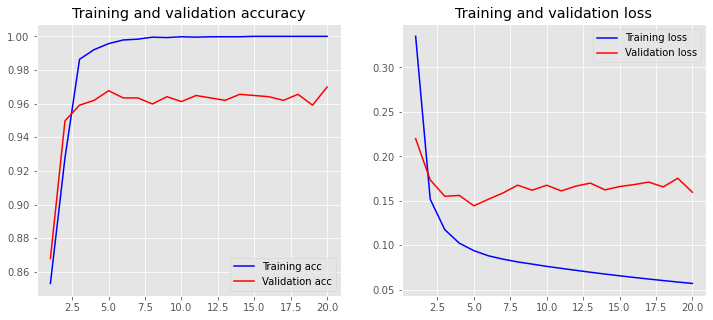

In [13]:
plot_history(history)

# **Testing with our Emails**

In [14]:
modelWE = keras.models.load_model('model.WE')

In [15]:
test = ["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!"]

test_tok  = tokenizer.texts_to_sequences(test)
test_tok = pad_sequences(test_tok, padding = 'post', maxlen=maxlen)
sentiment = modelWE.predict(test_tok,batch_size=1,verbose = 2)[0]

if sentiment > 0.5:
    label = "SPAM"
else:
    label = "HAM"

print(label, sentiment, test) 

SPAM [0.6590948] ['Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!']


# **LSTM - Long Short Term Memory**

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

model = Sequential()
# Turns positive integers (indexes) into dense vectors of fixed size. eg. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]] // This layer can only be used as the first layer in a model.
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',  # Binary Classification SPAM/HAM
              optimizer='adam',            # Adam optimization algorithm is an extension to stochastic gradient
              metrics=['accuracy'])        # Metrics we want to maximize
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 150)          1430100   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,530,601
Trainable params: 1,530,601
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, y_train,
          epochs=50,
          verbose=True,
          validation_data=(X_test,y_test),
          batch_size=100)

model.save('model.WE_LSTM')

Train on 4179 samples, validate on 1393 samples
Epoch 1/50
4179/4179 [==============================] - 7s 2ms/step - loss: 0.4463 - accuracy: 0.8457 - val_loss: 0.3919 - val_accuracy: 0.8679
Epoch 2/50
4179/4179 [==============================] - 6s 1ms/step - loss: 0.3966 - accuracy: 0.8653 - val_loss: 0.3912 - val_accuracy: 0.8679
Epoch 3/50
4179/4179 [==============================] - 6s 1ms/step - loss: 0.3965 - accuracy: 0.8653 - val_loss: 0.3907 - val_accuracy: 0.8679
Epoch 4/50
4179/4179 [==============================] - 7s 2ms/step - loss: 0.3963 - accuracy: 0.8653 - val_loss: 0.3904 - val_accuracy: 0.8679
Epoch 5/50
4179/4179 [==============================] - 7s 2ms/step - loss: 0.3965 - accuracy: 0.8653 - val_loss: 0.3938 - val_accuracy: 0.8679
Epoch 6/50
4179/4179 [==============================] - 7s 2ms/step - loss: 0.3964 - accuracy: 0.8653 - val_loss: 0.3906 - val_accuracy: 0.8679
Epoch 7/50
4179/4179 [==============================] - 7s 2ms/step - loss: 0.3966 - acc

In [18]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8653
Testing Accuracy:  0.8679


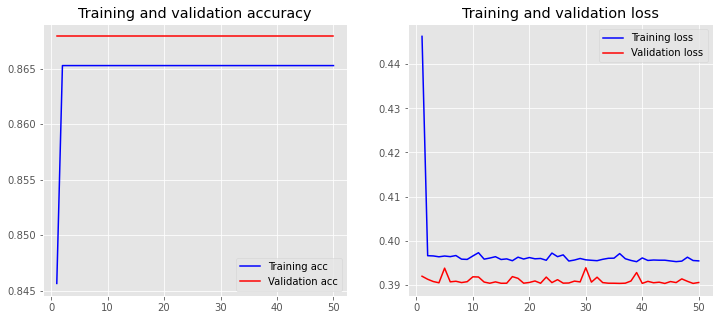

In [19]:
plot_history(history)

# **Testing with our Emails**

In [20]:
modelWE_LSTM = keras.models.load_model('model.WE_LSTM')

In [21]:
test = ["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!"]

test_tok  = tokenizer.texts_to_sequences(test)
test_tok = pad_sequences(test_tok, padding = 'post', maxlen=maxlen)
sentiment = modelWE_LSTM.predict(test_tok,batch_size=1,verbose = 2)[0]

if sentiment > 0.5:
    label = "SPAM"
else:
    label = "HAM"

print(label, sentiment, test) 

HAM [0.13962346] ['Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!']
